**Author: Nithyashree Suresh, Yuxin Li, Zhouling Shen, Chi Nam Tran**

**Dataset: [Ozempic datasets](https://drive.google.com/drive/folders/1-7uqThnk9tFvo9em_UNqwcnZhLUV9k80)**

#### 1. Exploratory Data Analysis (EDA) and 6. Additional Insights:

Conduct a thorough exploration of the provided datasets. This includes understanding the
structure, identifying missing values, and summarizing key statistics.
Generate visualizations to understand the distribution of important variables, relationships
between different variables, and any other patterns or anomalies in the data such as peculiar
patterns or outliers

In [1]:
# Import necessary libraries

# For data manipulation and analysis
import pandas as pd  
 # For handling binary data in memory
from io import BytesIO  
# For numerical computing
import numpy as np  
# For creating plots and visualizations
import matplotlib.pyplot as plt  
# For statistical data visualization
import seaborn as sns  

# Import module for data preprocessing
# For standardizing features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler  
# For encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Import modules for model selection
# For cross-validation
from sklearn.model_selection import cross_val_score  
# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split  

# Import modules for model evaluation metrics
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score  

# Import modules for linear models
# For Lasso regression and logistic regression models
from sklearn.linear_model import LassoCV, LogisticRegressionCV  
# For estimating statistical models and conducting tests
import statsmodels.api as sm  


In [2]:
#load the dataset
df_with_duplicates = pd.read_csv('medical_small.csv')
df_with_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623525 entries, 0 to 623524
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         623525 non-null  object 
 1   episode_id         623525 non-null  object 
 2   visit_id           621650 non-null  object 
 3   encounter_id       623525 non-null  object 
 4   claim_date         623525 non-null  object 
 5   patient_state      623525 non-null  object 
 6   patient_short_zip  623512 non-null  float64
 7   patient_age        616980 non-null  float64
 8   patient_gender     623393 non-null  object 
 9   place_of_service   484555 non-null  object 
 10  visit_type         600454 non-null  object 
 11  payor              608936 non-null  object 
 12  payor_channel      586086 non-null  object 
 13  ref_npi            297501 non-null  float64
 14  hcp_npi            434653 non-null  float64
 15  hcp_taxonomy       428209 non-null  object 
 16  hc

In [3]:
#print the percentage of missing values in each column
missing_values = df_with_duplicates.isnull().mean() * 100
missing_values = missing_values.sort_values(ascending=False)
print(missing_values)

rev_center_code      81.728720
proc_modifier        73.385510
diag_5               67.119843
ref_npi              52.287238
diag_4               52.169841
diag_3               41.416302
hcp_taxonomy         31.324486
hcp_specialty        31.321278
hcp_npi_list         30.291007
hcp_npi              30.291007
diag_2               26.130468
place_of_service     22.287799
payor_channel         6.004410
proc_code             3.835131
visit_type            3.700092
payor                 2.339762
patient_age           1.049677
hco_npi_list          0.919931
hco_npi               0.919931
proc_units            0.351870
rev_center_units      0.315464
visit_id              0.300710
diag_list             0.139529
diag_1                0.139529
patient_gender        0.021170
patient_short_zip     0.002085
line_charge           0.000000
claim_charge          0.000000
journey_id            0.000000
episode_id            0.000000
patient_state         0.000000
claim_date            0.000000
encounte

In [60]:
#drop the duplicates
df = df_with_duplicates.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563202 entries, 0 to 623524
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         563202 non-null  object 
 1   episode_id         563202 non-null  object 
 2   visit_id           561496 non-null  object 
 3   encounter_id       563202 non-null  object 
 4   claim_date         563202 non-null  object 
 5   patient_state      563202 non-null  object 
 6   patient_short_zip  563189 non-null  float64
 7   patient_age        557352 non-null  float64
 8   patient_gender     563073 non-null  object 
 9   place_of_service   439462 non-null  object 
 10  visit_type         543032 non-null  object 
 11  payor              549688 non-null  object 
 12  payor_channel      528756 non-null  object 
 13  ref_npi            269303 non-null  float64
 14  hcp_npi            397159 non-null  float64
 15  hcp_taxonomy       391502 non-null  object 
 16  hcp_spe

In [5]:
#checked for duplicates in excel and found lesser duplicates so tried to drop duplicates using concatenation
# Concatenate all columns into a new column

df_check = pd.DataFrame(df_with_duplicates)

# Concatenate all columns into a new column
df_check['new_concated_column'] = df_check.apply(lambda row: ''.join(map(str, row)), axis=1)

# Drop duplicate rows based on the concatenated column and keep the first occurrence
df_unique = df_check.drop_duplicates(subset='new_concated_column')

df_unique.info()

#concluding that the duplicate rows dropped for both methods are same. 
#Continuing analysis with df

<class 'pandas.core.frame.DataFrame'>
Index: 563202 entries, 0 to 623524
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   journey_id           563202 non-null  object 
 1   episode_id           563202 non-null  object 
 2   visit_id             561496 non-null  object 
 3   encounter_id         563202 non-null  object 
 4   claim_date           563202 non-null  object 
 5   patient_state        563202 non-null  object 
 6   patient_short_zip    563189 non-null  float64
 7   patient_age          557352 non-null  float64
 8   patient_gender       563073 non-null  object 
 9   place_of_service     439462 non-null  object 
 10  visit_type           543032 non-null  object 
 11  payor                549688 non-null  object 
 12  payor_channel        528756 non-null  object 
 13  ref_npi              269303 non-null  float64
 14  hcp_npi              397159 non-null  float64
 15  hcp_taxonomy         3

In [6]:
#print the percentage of missing values in each column
missing_values = df.isnull().mean() * 100
missing_values = missing_values.sort_values(ascending=False)
print(missing_values)

#no significant changes in the percentage of missing values after dropping duplicates

rev_center_code      81.829965
proc_modifier        73.623496
diag_5               66.859493
ref_npi              52.183586
diag_4               51.920093
diag_3               41.235116
hcp_taxonomy         30.486397
hcp_specialty        30.482846
hcp_npi_list         29.481962
hcp_npi              29.481962
diag_2               26.032400
place_of_service     21.970803
payor_channel         6.116100
proc_code             3.853502
visit_type            3.581308
payor                 2.399494
patient_age           1.038704
hco_npi_list          0.936964
hco_npi               0.936964
proc_units            0.349253
rev_center_units      0.318181
visit_id              0.302911
diag_list             0.149502
diag_1                0.149502
patient_gender        0.022905
patient_short_zip     0.002308
line_charge           0.000000
claim_charge          0.000000
journey_id            0.000000
episode_id            0.000000
patient_state         0.000000
claim_date            0.000000
encounte

In [7]:
#check for unique values in each column
unique_values = df.nunique()
print(unique_values)

journey_id            27377
episode_id            94846
visit_id             239791
encounter_id         279875
claim_date              664
patient_state             5
patient_short_zip        93
patient_age              11
patient_gender            2
place_of_service         31
visit_type                8
payor                   189
payor_channel             8
ref_npi               23077
hcp_npi               32491
hcp_taxonomy            339
hcp_specialty           191
hco_npi               11099
hcp_npi_list          32738
hco_npi_list          16892
diag_list            150710
diag_1                 8668
diag_2                 7431
diag_3                 6196
diag_4                 5323
diag_5                 4148
rev_center_code         269
rev_center_units         63
proc_code              6347
proc_modifier           299
proc_units              616
line_charge           30195
claim_charge          30195
smart_allowed         18662
dtype: int64


623,525 data points pertaining to only 27,377 paitents

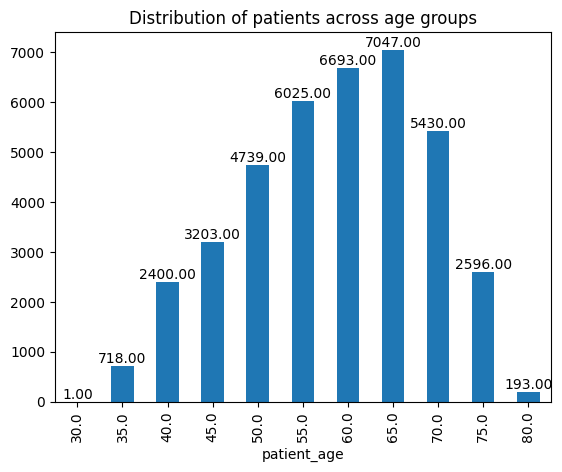

In [8]:
# plot bar chart for the distribution of patients across age groups
p_age = df.groupby('patient_age')['journey_id'].nunique()


# plot a bar plot
plt.title('Distribution of patients across age groups')
p_age.plot.bar()
for i, v in enumerate(p_age):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

1.It was observed that there were only 11 age categories in the dataset. In a real life drug administration setting, it is highly unlikely that
only these 11 age categories would be present. Concluding that this is a limitation of the dataset but for the purpose of this analysis, it is assumed that the age categories are correct.
2. It was also observed that the dataset contains the highest record on patients aged between 60 and 70 years.

In [9]:
#since the objective is to look into effects of Ozempic on obese and hypertensive patients aged 40-75, dropping rows with 'patient_age' 30, 35 and 80 from the original dataset
df = df[(df['patient_age'] != 30) & (df['patient_age'] != 35) & (df['patient_age'] != 80)]

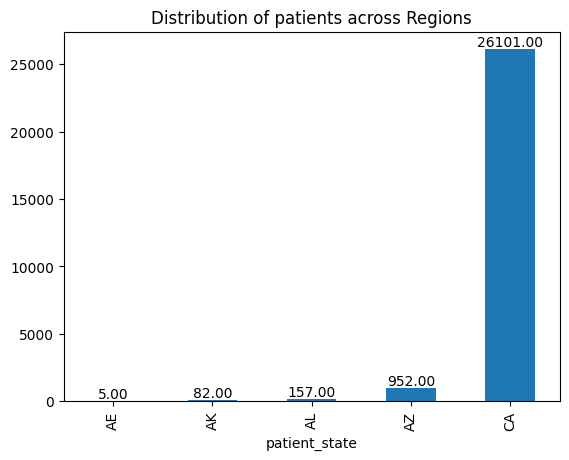

In [10]:
# plot bar chart for the distribution of patients across regions
p_state = df.groupby('patient_state')['journey_id'].nunique()

# plot a bar plot
plt.title('Distribution of patients across Regions')
p_state.plot.bar()
for i, v in enumerate(p_state):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

1. From the plot it was observed that the data was collected only in 4 states in the US and Armed forces of Europe. 

a. California

b. Arizona

c. Alabama

d. Arkansas

e. AE - indicates that patients are likely affiliated with military installations or diplomatic missions in certain locations of Europe, Canada, Africa and middle East

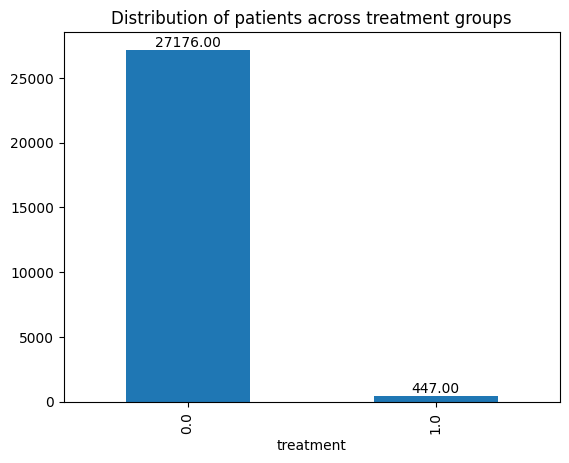

In [11]:
#since we are interested in looking at patients with ozempic prescription, we will filter only them out to check the count
# we will use proc_code column to filter out the patients with ozempic prescription
# proc_code for ozempic are 
# J3490 ( Code used for Unclassified drugs, ozempic in this case), 
# J2182 (semaglutide, 0.25 mg, this is the active ingredient in ozempic) , 
# J2183 (semaglutide, 0.5 mg), C9399 (temporary code for unclassified drugs)

# there is no occurence where one journey_id has multiple proc_code for ozempic

# create a treatment variable to indicate if the patient has been prescribed ozempic

df.loc[df['proc_code'].isin(['J3490', 'J2182', 'J2183', 'C9399']), 'treatment'] = 1
df.loc[~df['proc_code'].isin(['J3490', 'J2182', 'J2183', 'C9399']), 'treatment'] = 0

# plot bar chart for the distribution of patients across the two treatment groups
p_treatment = df.groupby('treatment')['journey_id'].nunique()
plt.title('Distribution of patients across treatment groups')
p_treatment.plot.bar()
for i, v in enumerate(p_treatment):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
    

In [12]:
# identify what the diganosis codes mean
# The best way to identify this is to look at the first three digits of the diagnosis codes
# see the frequency of the dignosis codes and identify the most frequent ones

# 1. Select 'diag_' columns
diag_columns = [col for col in df.columns if col.startswith('diag_')]
df_diag = df[diag_columns]

# 2. Combine values 
combined_list = df_diag.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]

# 3. Process first three digits (same as before)
first_three_counts = {}
for diag_code in combined_list:
    first_three = diag_code[:3]
    first_three_counts[first_three] = first_three_counts.get(first_three, 0) + 1

# Sort the dictionary items by count (descending order)
import operator
sorted_counts = sorted(first_three_counts.items(), key=operator.itemgetter(1), reverse=True)

for items in sorted_counts:
    print(items)


('E11', 209195)
('I10', 179970)
('E78', 102300)
('Z00', 85158)
('E66', 63169)
('Z68', 48834)
('M25', 46136)
('M54', 44478)
('Z12', 29291)
('N18', 28599)
('Z01', 27498)
('Z13', 26851)
('M79', 25938)
('G47', 24973)
('E55', 24226)
('R10', 24163)
('Z79', 24111)
('Z71', 23855)
('R73', 22187)
('R07', 22027)
('E03', 21847)
('N39', 19689)
('M17', 19349)
('D64', 17708)
('I25', 15736)
('Z20', 14859)
('R53', 14448)
('I50', 13910)
('R06', 13562)
('J44', 12906)
('Z23', 12144)
('F41', 12055)
('I48', 11416)
('K21', 11101)
('G89', 10542)
('I11', 10047)
('Z11', 10038)
('F33', 9707)
('N40', 9674)
('E87', 9402)
('J45', 9385)
('M19', 9089)
('M47', 8638)
('D50', 8417)
('R68', 8361)
('A41', 8296)
('J96', 8252)
('R05', 7940)
('M51', 7927)
('F32', 7912)
('U07', 7897)
('I12', 7293)
('B35', 7107)
('L03', 7028)
('Z51', 6790)
('R79', 6723)
('R42', 6400)
('Z76', 6392)
('H25', 6377)
('N17', 6373)
('K76', 6362)
('R51', 6323)
('M48', 6218)
('M62', 5984)
('R00', 5918)
('L97', 5918)
('C50', 5889)
('F17', 5800)
('I70', 

TOP 5 DIAGNOSIS CODES

E11  Type 2 diabetes mellitus

I10  Essential (primary) hypertension

E78  Disorders of lipoprotein metabolism and other lipidemias

Z00  Encounter for general examination without complaint, suspected or reported diagnosis

E66  Overweight and obesity

it can be observed that major occurance was the patient was diabetic
second and fifth on the list were hypertension and overweight 

ozempic is prescribed to patients who have all these health issues

Birdseye view may say that since so many patients suffer from this issue, they might all have been given the drug. 

The hypothese must be tested by filtering out only the patients who were actually administered the drug



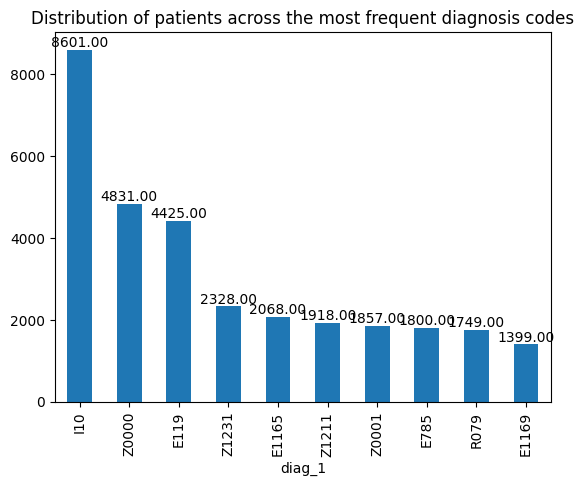

In [13]:
#check for distribution of patients first diagnosis across the most frequent diagnosis codes
p_diag = df.groupby('diag_1')['journey_id'].nunique()
p_diag = p_diag.sort_values(ascending=False)
p_diag = p_diag.head(10)
plt.title('Distribution of patients across the most frequent diagnosis codes')
p_diag.plot.bar()
for i, v in enumerate(p_diag):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
plt.show()

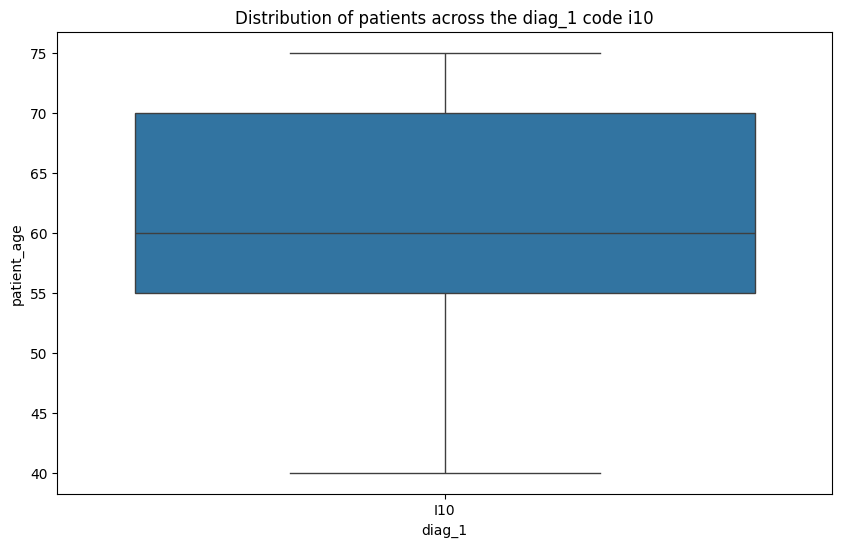

In [14]:
#create a boxplot to check for distribution of patients across the diag_1 code i10
#filter out the patients with diag_1 I10
df_i10 = df[df['diag_1'] == 'I10']

plt.figure(figsize=(10, 6))
sns.boxplot(x='diag_1', y='patient_age', data=df_i10)
plt.title('Distribution of patients across the diag_1 code i10')
plt.show()

#median age of the patients with diag_1 I10 is around 60

In [15]:
#check for top diagnosis codes for patients who were prescribed ozempic
# filter the dataset for patients who were prescribed ozempic using treatment variable
df_ozempic = df[df['treatment'] == 1]



# 1. Select 'diag_' columns
diag_columns = [col for col in df_ozempic.columns if col.startswith('diag_')]
df_diag = df_ozempic[diag_columns]

# 2. Combine values 
combined_list = df_diag.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]

# 3. Process first three digits (same as before)
first_three_counts = {}
for diag_code in combined_list:
    first_three = diag_code[:3]
    first_three_counts[first_three] = first_three_counts.get(first_three, 0) + 1

# Sort the dictionary items by count (descending order)
import operator
sorted_counts = sorted(first_three_counts.items(), key=operator.itemgetter(1), reverse=True)

for items in sorted_counts:
    print(items)


('I10', 228)
('E11', 219)
('E78', 126)
('N18', 95)
('I25', 83)
('M54', 71)
('E66', 67)
('Z79', 67)
('Z51', 62)
('R07', 57)
('I48', 50)
('J45', 46)
('M25', 41)
('M19', 40)
('R10', 40)
('G89', 39)
('D68', 38)
('Z99', 35)
('K21', 34)
('F41', 33)
('Z68', 33)
('H25', 30)
('J44', 30)
('M17', 28)
('C50', 28)
('M47', 25)
('Z87', 24)
('D50', 23)
('N25', 23)
('Z30', 22)
('G47', 21)
('Z88', 21)
('M79', 21)
('R51', 20)
('E03', 20)
('F33', 20)
('J20', 19)
('R06', 19)
('Z20', 18)
('M48', 18)
('I50', 17)
('M70', 16)
('F17', 16)
('F32', 16)
('Z85', 15)
('Z86', 15)
('C61', 15)
('I12', 15)
('I11', 15)
('N13', 15)
('I49', 14)
('R11', 14)
('K57', 14)
('K29', 14)
('K44', 14)
('M51', 14)
('N20', 14)
('D63', 14)
('F31', 14)
('K59', 13)
('R94', 13)
('D25', 13)
('Z01', 13)
('G43', 12)
('M16', 12)
('D64', 12)
('Z90', 12)
('K80', 11)
('Z95', 11)
('C77', 11)
('R05', 11)
('R26', 11)
('H40', 11)
('R19', 11)
('T85', 11)
('R52', 11)
('I13', 10)
('K64', 10)
('J30', 10)
('K43', 10)
('N39', 10)
('C78', 10)
('K40', 10)
(

TOP 5 DIAGNOSIS CODES for ozempic patients

I10  Essential (primary) hypertension

E11  Type 2 diabetes mellitus

E78  Disorders of lipoprotein metabolism and other lipidemias

N18  Chronic kidney disease (CKD)

I25  Chronic ischemic heart disease

conclusion: very few of the people who were diagnoised with the above mentioned (t can be observed that major occurance was the patient was diabetic. second and fifth on the list were hypertension and overweight ) health issues have been treated with ozempic. the top diagnosis codes order has also changed for the ozempic patients

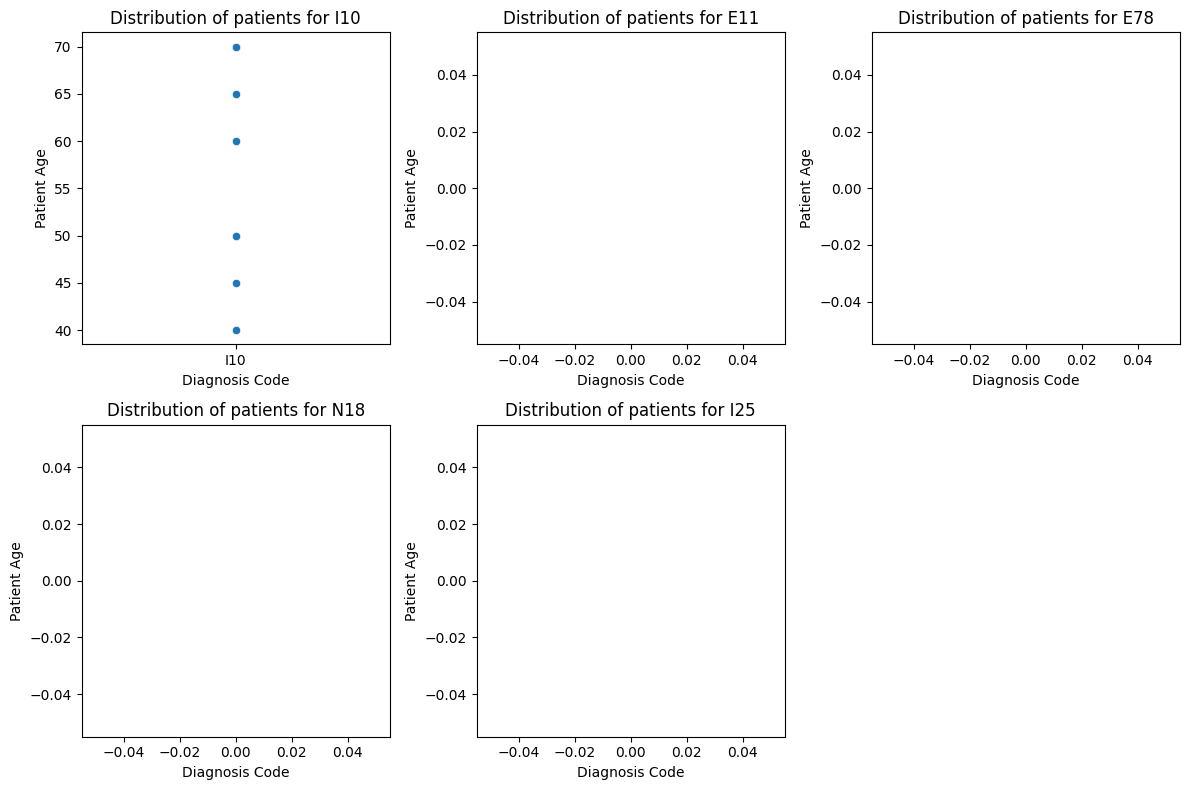

In [27]:
#create a boxplot to check for distribution of patients across the diag_1 code i10
#filter out the patients with diag_1 I10
#df_diagnosis = df_ozempic[df_ozempic['diag_1'] == 'I10']

#plt.figure(figsize=(10, 6))
#sns.boxplot(x='diag_1', y='patient_age', data=df_i10)
#plt.title('Distribution of patients across the Top diagnosis codes for patients who were prescribed ozempic')
#plt.show()


# Filter the data for each diagnosis code and create boxplots
codes = ['I10', 'E11', 'E78', 'N18', 'I25']

plt.figure(figsize=(12, 8))

for i, code in enumerate(codes, 1):
    plt.subplot(2, 3, i) 
    # Filter the data for each diagnosis code

    df_diagnosis_1 = df_ozempic[df_ozempic['diag_1'] == code]
    sns.scatterplot(x='diag_1', y='patient_age', data=df_diagnosis_1)
    plt.title(f'Distribution of patients for {code}')
    plt.xlabel('Diagnosis Code')
    plt.ylabel('Patient Age')

plt.tight_layout()
plt.show()


#didn't quite work as expected, abondoning this approach





In [17]:
#check for hypertension diagnosed patients
# filter the dataset for patients who were diagnosed with hypertension using diag_ columns

df_hypertension = df_ozempic[df_ozempic['diag_1'].str.startswith("I10")|
      df_ozempic['diag_2'].str.startswith("I10")|
      df_ozempic['diag_3'].str.startswith("I10")|
      df_ozempic['diag_4'].str.startswith("I10")|
      df_ozempic['diag_5'].str.startswith("I10")]

df_hypertension['diag'] = "hypertension"
df_hypertension.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 1055 to 622748
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   journey_id         219 non-null    object 
 1   episode_id         219 non-null    object 
 2   visit_id           219 non-null    object 
 3   encounter_id       219 non-null    object 
 4   claim_date         219 non-null    object 
 5   patient_state      219 non-null    object 
 6   patient_short_zip  219 non-null    float64
 7   patient_age        211 non-null    float64
 8   patient_gender     219 non-null    object 
 9   place_of_service   30 non-null     object 
 10  visit_type         219 non-null    object 
 11  payor              216 non-null    object 
 12  payor_channel      205 non-null    object 
 13  ref_npi            22 non-null     float64
 14  hcp_npi            206 non-null    float64
 15  hcp_taxonomy       205 non-null    object 
 16  hcp_specialty      205 no

C:\Users\nithy\AppData\Local\Temp\ipykernel_19648\3495314072.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hypertension['diag'] = "hypertension"


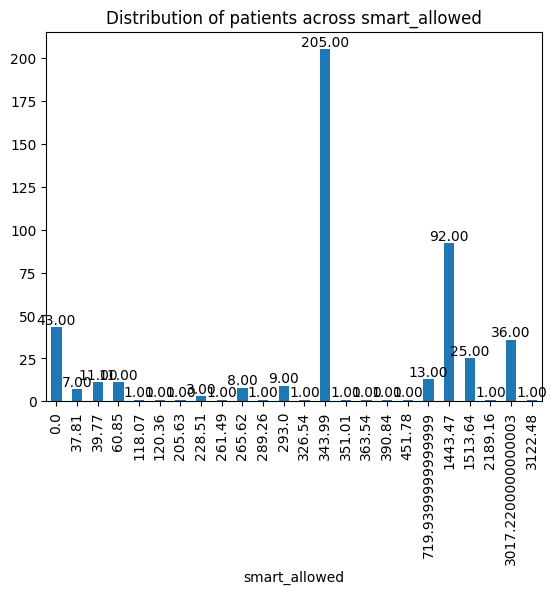

In [62]:
#check for distribution of smart_allowed of patients who were prescribed ozempic across all the states combined
p_smart = df_ozempic.groupby('smart_allowed')['journey_id'].nunique()
plt.title('Distribution of patients across smart_allowed')
p_smart.plot.bar()
for i, v in enumerate(p_smart):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
plt.show()

#Most of the patients who were prescribed ozempic have smart_allowed of 350 dollars. Ozempic is a costly drug and the smart_allowed is actual cost of the drug including the payouts
#considering the fact that ozempic needs to be taken weekly or bi-weekly, the cost of the drug is a significant factor for the patients

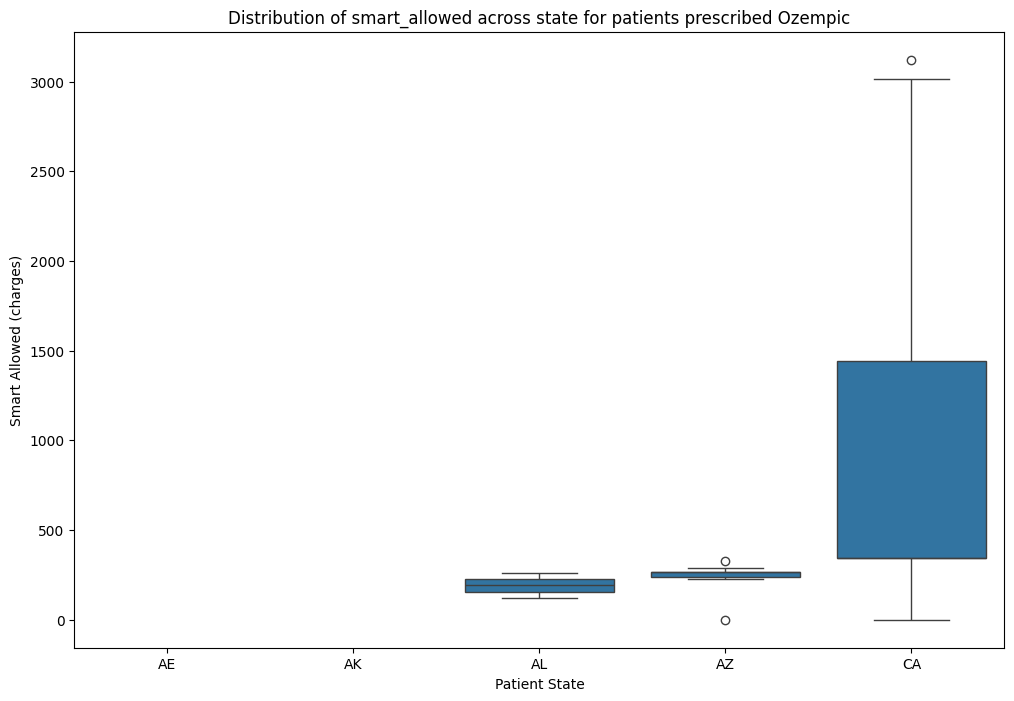

In [65]:
import seaborn as sns

# Filter the DataFrame for patients who were prescribed Ozempic
df_ozempic_first_occurrence = df_ozempic.drop_duplicates(subset='journey_id', keep='first')

# Create a boxplot for each state
plt.figure(figsize=(12, 8))
sns.boxplot(x='patient_state', y='smart_allowed', data=df_ozempic_first_occurrence, order=['AE', 'AK', 'AL', 'AZ', 'CA'])
plt.title('Distribution of smart_allowed across state for patients prescribed Ozempic')
plt.xlabel('Patient State')
plt.ylabel('Smart Allowed (charges)')
plt.show()

#outliers can be seen in the boxplot for the smart_allowed across states. The outliers are the patients who have smart_allowed of 0 dollars.

#though the cost of living in the state of California is high, the money earned is also high compared to the other states.
#one may infer that the patients in California are able to afford the cost of the drug compared to the other states and hence were prescribed ozempic or chosen for the treatment observation itself

#another insight can be pulled from looking at the difference between the smart allowed payor cost to see if patients with any specific payor channel was more likely to prescribe ozempic
#looking at the distribution of payor channels in the states would add more insight to the analysis


,diag,patient_gender,count,gender_ratio
0,hypertension,F,93,0.556886
1,hypertension,M,74,0.443114


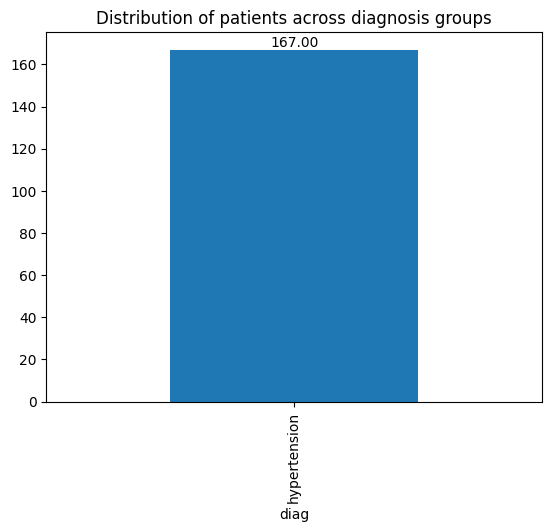

In [18]:
#check for hypertension diagnosed patients distribution compared to all other diagnosed patients
# plot bar chart for the distribution of patients across the two groups
p_diag = df_hypertension.groupby('diag')['journey_id'].nunique()
plt.title('Distribution of patients across diagnosis groups')
p_diag.plot.bar()
for i, v in enumerate(p_diag):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')



p_gender_cnt = df_hypertension.groupby(['diag', 'patient_gender'])['journey_id'].nunique().reset_index(name = 'count')
total_cnt = p_gender_cnt.groupby('diag')['count'].transform('sum')
p_gender_cnt['gender_ratio'] = p_gender_cnt['count']/total_cnt
p_gender_cnt

In [19]:
#out of the 219 rows, the dataframe consists diagnosis of 167 unique patients out of which 93 are women and 74 are men

(array([52.,  0., 51.,  0.,  0.,  0.,  0., 58.,  0., 58.]),
 array([2019. , 2019.4, 2019.8, 2020.2, 2020.6, 2021. , 2021.4, 2021.8,
        2022.2, 2022.6, 2023. ]),
 <BarContainer object of 10 artists>)

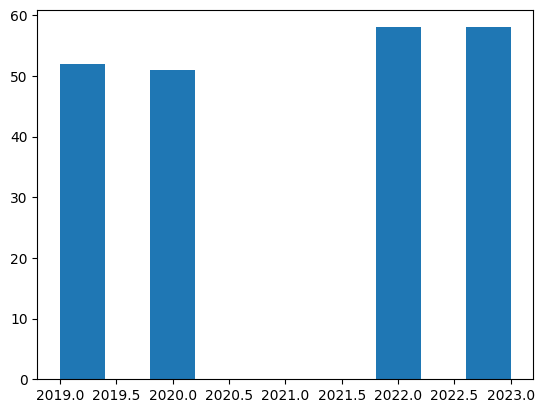

In [20]:
plt.hist(pd.to_datetime(df_hypertension['claim_date']).dt.year)
#this plot susggests that the claims for hypertension diagnosed patients went down in 2020, this could be due to the pandemic, due to lack of access to medical professionals since patients weren't allwoed to visit the doctors due to the lockdowns


#Q2 Data Preprocessing and Merging:

Prepare the datasets for analysis by handling missing data, encoding categorical variables, and any other necessary preprocessing steps.
    
Merge the Medical and Prescription datasets appropriately, ensuring a coherent structure for further analysis

In [58]:
#post EDA, shift in approach. Merge the datasets to get the final dataset for analysis
# read the medical dataset
df1 = pd.read_csv("longyear-obese-hypertensive-40-57-medical-SMALL-sample.csv")
#read the script dataset
df2 = pd.read_csv("longyear-obese-hypertensive-40-75-scripts-SMALL-sample.csv")

C:\Users\nithy\AppData\Local\Temp\ipykernel_19648\4059036042.py:5: DtypeWarning: Columns (9,10,29,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("longyear-obese-hypertensive-40-75-scripts-SMALL-sample.csv")


In [ ]:
#merge the datasets on journey_id column

Obesedf = pd.merge(df1, df2, on='journey_id')

In [ ]:
#creating a columns to drop list so that after checking for missing values, we can drop the columns with more than 10% missing values

cols_to_drop=[]
def display_missing_perc(Obesedf):    
    for col in Obesedf.columns.tolist():       
        missing_value = 100*(Obesedf[col].isnull().sum()/len(Obesedf[col]))
        print(f'{col} column missing values: {missing_value}')
        if missing_value >= 10:
            cols_to_drop.append(col)
    print('\n')
display_missing_perc(Obesedf)

In [ ]:
#treat the missing values in the dataset seperately for numerical and categorical columns
#fill the missing values in numerical columns with mean
numerical_columns = Obesedf.select_dtypes(include=['number']).columns
for col in numerical_columns:
    Obesedf[col].fillna(Obesedf[col].mean(), inplace=True)
#fill the missing values in categorical columns with mode
categorical_columns = Obesedf.select_dtypes(include=['object']).columns
for col in categorical_columns:
    Obesedf[col].fillna(Obesedf[col].mode()[0], inplace=True)

In [ ]:
#recheck for missing values

cols_to_drop=[]
def display_missing_perc(Obesedf):    
    for col in Obesedf.columns.tolist():       
        missing_value = 100*(Obesedf[col].isnull().sum()/len(Obesedf[col]))
        print(f'{col} column missing values: {missing_value}')
        if missing_value >= 10:
            cols_to_drop.append(col)
    print('\n')
display_missing_perc(Obesedf)

In [ ]:
#using the resources provided during the TA session, these were the codes identified for obesity and hypertension

codes = ['I10', 'Z6854', 'E66.9', 'E66.0', 'E66.8', 'E66.2']
pattern = '|'.join(codes)  

# Filter rows where diag_list contains any of the codes
filter_df = Obesedf[Obesedf['diag_list'].str.contains(pattern, regex=True, na=False)]

#since the objective is to look into effects of Ozempic on obese and hypertensive patients aged 40-75, dropping rows with 'patient_age' 30, 35 and 80 from the original dataset
filtered_Obesedf = filter_df[(filter_df['patient_age'] != 30) & (filter_df['patient_age'] != 35) & (filter_df['patient_age'] != 80)]

#due to computational limitations, dropping the columns that don't seem to be useful for the analysis for the current approach
cols_to_drop = ["diag_1", "diag_2", "diag_3", "diag_4", "diag_5", "patient_zip", "reject_code_1", 
                "reject_code_3", "reject_code_4", "reject_code_5","episode_id","visit_id","encounter_id",
                "cohort_id","claim_id","patient_gender_y","patient_state_y","patient_dob",]
filtered_Obesedf.drop(cols_to_drop, axis=1, inplace=True)

filtered_Obesedf.shape

In [ ]:
#create a column to indicate if the patient has been prescribed ozempic
merged_df_encoded['treated_with_ozempic'] = ((merged_df_encoded['proc_code'] == 'J3490') | (merged_df_encoded['proc_code'] == 'C9399') |
                              merged_df_encoded['ndc'].astype(str).str.contains('169413|1694181|1694772')).astype(int)

In [ ]:
#look at the counts of patients who were prescribed ozempic
treatment_effect_counts = merged_df_encoded['treated_with_ozempic'].value_counts()

# Displaying the counts
print(treatment_effect_counts)

In [ ]:
# drop the columns 
merged_df_encoded = merged_df_encoded.drop(columns=['proc_code', 'ndc'])

In [ ]:
#create a copy of the final dataset
merged_df_final = merged_df_encoded.copy()

In [ ]:
# due to the computational limitations, sampling the dataset to 1 million rows
sampled_df = merged_df_final.sample(n=1000000, random_state=42)

In [ ]:
#the startegy to calculate the effect of ozempic on the patients is to check if the diag_list codes have changed after the prescription of ozempic
# if the diag_list codes have changed, then the effect of ozempic is 1, else 0

#create a function to calculate the effect of ozempic on the patients
def calculate_ozempic_effect(sampled_df):
    effect_dict = {}  
    
    for journey_id in sampled_df['journey_id'].unique():
        current_journey = sampled_df[sampled_df['journey_id'] == journey_id]
        
        has_changed = 0  
        e66_history = []  
        i10_history = []  
        
       
        for index, row in current_journey.iterrows():
          
            if pd.notnull(row['diag_list']):
                current_diag_list = row['diag_list'].split(',')
                
                
                e66_present = any('E66' in diag for diag in current_diag_list)
                i10_present = any('I10' in diag for diag in current_diag_list)
                
             
                if e66_history and e66_present != e66_history[-1]:
                    has_changed = 1
                if i10_history and i10_present != i10_history[-1]:
                    has_changed = 1
                
              
                e66_history.append(e66_present)
                i10_history.append(i10_present)
        
       
        effect_dict.update(dict.fromkeys(current_journey.index, has_changed))
    
    
    sampled_df['ozempic_effect'] = sampled_df.index.map(effect_dict).fillna(0)


calculate_ozempic_effect(sampled_df)

In [ ]:
#check for the count of unique values of ozempic effect variable
#comparing this to the old count, we can see the effect of ozempic on the patients

ozempic_outcome_counts = sampled_df['ozempic_effect'].value_counts()

print(ozempic_outcome_counts)
#1 represents that there was an observed effect or change related to Ozempic treatment, and 0 represents that there was no observed effect or change related to Ozempic treatment.


#q3 : Causal Analysis Setup:
1) Discuss the potential endogeneity issues in estimating the treatment effect of Ozempic on the target population.
2) Outline your strategy for addressing endogeneity, referencing the big-picture problem of causality and treatment effect estimation

The big-picture problem needs to be addressed with a comprehensive understanding of the problems that come with observational data
Experimentation is the gold standard of assessing treatment effect but it is not possible to attain for all cases.
that's when we rely on observational data. Observational data is inherently biased. Selection bias can be a major issue where subjects if not the ozempic prescribed patients but the prescriber themselves self volunteer for the program
controlling treatment could also be a problem. If a paitent is morbidly obese and has high sugar levels, they can't be said no to if they clear all the criteria to be treated with the drug
we cannot account for reverse causality. In some of the cases, the outcome variable may affect the treatment assignment, leading to reverse 
causality, for example, patients with specific health conditions may be more likely to be prescribed Ozempic
Another potential problem is related to failing to identify confounding variables which leads to biased estiamte of treatment
All these problems should be considered before coming up with a strategy. First step would be to identify potential confounding variables correlated with both treatment and the outcome variables, once identified, add them to the model
Confounders can be controlled using stratification, matching, or propensity score matching to control for confounders when appropriate.
Identify instrumntal variables that are corelated with the treatment variable but are not directly related to the outcome variable. they can help address endogeneity by providing a source of variations that are exogenous in the treatment variable
one can conduct sensitivity analysis to assess the match of treatment effect estimates to potential bias creating sources which remain  unobserved. 

#q4: Model Development: Double-Lasso / Treatment Effect Lasso :

Implement the double-lasso technique to estimate the treatment effect of Ozempic, considering the endogeneity of treatment assignment

In [ ]:
class SelectiveRegularizationLinearRegression:
    def __init__(self, alpha, apply_penalty, tolerance=1e-4, max_iterations=1000):
        self.alpha = alpha
        self.tolerance = tolerance
        self.apply_penalty = apply_penalty
        self.max_iterations = max_iterations
        self.w = None
        
    def _predicted_values(self, X, w):
        return np.matmul(X, w)

    def _rho_compute(self, y, X, w, j):
        X_k = np.delete(X, j, 1)
        w_k = np.delete(w, j)
        predict_k = self._predicted_values(X_k, w_k)
        residual = y - predict_k
        rho_j = np.sum(X[:, j] * residual)
        return rho_j

    def _z_compute(self, X):
        return np.sum(X * X, axis=0)
    
    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        n_samples, n_features = X.shape
        if not self.w:
            self.w = np.zeros(n_features)
        z = self._z_compute(X)
        for iteration in range(self.max_iterations):
            max_step = 0
            for j in range(n_features):
                rho_j = self._rho_compute(y, X, self.w, j)
                w_j_old = self.w[j]
                if j == 0:
                    self.w[j] = rho_j / z[j]
                else:
                    if self.apply_penalty[j]:
                        if rho_j < -self.alpha * n_samples:
                            self.w[j] = (rho_j + self.alpha * n_samples) / z[j]
                        elif -self.alpha * n_samples <= rho_j <= self.alpha * n_samples:
                            self.w[j] = 0.
                        elif rho_j > self.alpha * n_samples:
                            self.w[j] = (rho_j - self.alpha * n_samples) / z[j]
                    else:
                        self.w[j] = rho_j / z[j]
                max_step = max(max_step, abs(self.w[j] - w_j_old))
            if max_step < self.tolerance:
                break
        return self

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        if self.w is None:
            raise ValueError("Model is not fitted yet!")
        return self._predicted_values(X, self.w)

In [ ]:
#considering these confounders for the model
#the demographic variables - paptient state, zip codecould give out socioeconomic status, access to healthcare facilities  and environmental factors.
#age and gender can tell us if the treatment effect is different for different age groups  
#place_of_service_x and vist type tells us institutional setting and quality of care which can affect the treatment effect
#payor, payor_channel payment channel may influence treatment access and utilization
#prescribing physician and dispensing pharmacy can affect treatment adherence and follow-up
# pharmacy related variables tell us medication usage patterns, adherence, and treatment duration
confounders = ['patient_state_x', 'patient_short_zip', 'patient_age', 'patient_gender_x', 
               'place_of_service_x', 'visit_type', 'payor', 'payor_channel', 'hcp_npi', 
               'hcp_taxonomy', 'hcp_specialty', 'hco_npi', 'line_charge', 'claim_charge', 
               'smart_allowed', 'pharmacy_npi', 'prescriber_npi', 'fill_number', 
               'number_of_refills_authorized', 'quantity_dispensed', 'days_supply']

In [ ]:
# set the confounders as the independent variables and the ozempic_effect as the dependent variable
X = sampled_df[confounders]
Y = sampled_df['ozempic_effect'].to_numpy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# cross validate the model
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)
best_alpha_1 = lasso_cv.alpha_

# perform Lasso regression
lasso1 = SelectiveRegularizationLinearRegression(alpha=best_alpha_1, apply_penalty=[True]*X.shape[1])
lasso1.fit(X_train, y_train)

In [ ]:
#identify the coefficients from the lasso model and consider the non zero coefficients to run the second lasso model
# Identify selected confounders
selected_confounders = [i for i, coef in enumerate(lasso1.w[:-1]) if coef != 0]

# Add intercept column
X_train_intercept = np.column_stack((np.ones(len(X_train)), X_train))

# Perform cross-validation to find the best alpha
lasso_cv2 = LassoCV(cv=5)
lasso_cv2.fit(X_train_intercept[:, selected_confounders], y_train)
best_alpha_2 = lasso_cv2.alpha_

# Fit the second Lasso regression model

lasso2 = SelectiveRegularizationLinearRegression(alpha=best_alpha_2, apply_penalty=[False]*len(selected_confounders) + [True])
lasso2.fit(X_train_intercept[:, selected_confounders + [-1]], y_train)

# use test dataset to predict the treatment effect
X_test_intercept = np.column_stack((np.ones(len(X_test)), X_test))
predictions = lasso2.predict(X_test_intercept[:, selected_confounders + [-1]])

In [ ]:
#q5 Model Evaluation and Interpretation :
# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Interpret the estimated treatment effects
# Treatment effect is the coefficient associated with the treatment variable (treated_with_ozempic)
treatment_effect = lasso2.w[-1]
print("Estimated Treatment Effect:", treatment_effect)

#Higer the R squared the better(close to 1). the low r-squared suggests that the model is not the perfect fit for the data, there is room for improvement
#the estimated treatment effect is very small but negative, which suggests that the treatment has a negative effect on the patients
#(lower the error the better) the mean squared error is very high, which suggests that the model is not the perfect fit for the data, there is room for improvement
#results suggest that the predictive capacity of the model is limited.
#these results shed light on the complexity of estimating treatment effects in observational studies and the importance of controlling for confounding variables to obtain robust and reliable estimates
